In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

1.8.0


## Load dataset

In [2]:
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

## One-hot encoding

In [3]:
import numpy as np
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
        
    return results

In [4]:
NUM_WORDS = 10000

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [5]:
train_data.shape

(25000, 10000)

In [6]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

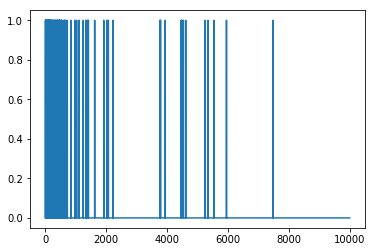

In [7]:
plt.plot(train_data[0])

## 过拟合和欠拟合
### 过拟合解决方案：
- 最好方案：更多的训练数据
- 次优方案：正则化技术
   

## 正则化技术

### 缩小模型Dropout
- 减少模型中可学习参数的数量，提高泛化能力
- 最小化损失，必须学习具有更强预测能力的压缩表示法

### L1/L2正则化

## 创建模型

In [8]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape = (NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer="adam",
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.4963 - acc: 0.7922 - binary_crossentropy: 0.4963 - val_loss: 0.3415 - val_acc: 0.8771 - val_binary_crossentropy: 0.3415
Epoch 2/20
 - 7s - loss: 0.2505 - acc: 0.9122 - binary_crossentropy: 0.2505 - val_loss: 0.2849 - val_acc: 0.8880 - val_binary_crossentropy: 0.2849
Epoch 3/20
 - 7s - loss: 0.1799 - acc: 0.9381 - binary_crossentropy: 0.1799 - val_loss: 0.2908 - val_acc: 0.8858 - val_binary_crossentropy: 0.2908
Epoch 4/20
 - 7s - loss: 0.1412 - acc: 0.9522 - binary_crossentropy: 0.1412 - val_loss: 0.3182 - val_acc: 0.8792 - val_binary_crossentropy: 0.3182
Epoch 5/20
 - 7s - loss: 0.1145 - acc: 0.9628 - binary_crossentropy: 0.1145 - val_loss: 0.3468 - val_acc: 0.8738 - val_binary_crossentropy: 0.3468
Epoch 6/20
 - 7s - loss: 0.0913 - acc: 0.9722 - binary_crossentropy: 0.0913 - val_loss: 0.3790 - val_acc: 0.8697 - val_binary_crossentropy: 0.3790
Epoch 7/20
 - 7s - loss: 0.0723 - acc: 0.9808 - binary_crossentropy:

### 更小的模型

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape = (NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer="adam",
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.6405 - acc: 0.7017 - binary_crossentropy: 0.6405 - val_loss: 0.5823 - val_acc: 0.8064 - val_binary_crossentropy: 0.5823
Epoch 2/20
 - 7s - loss: 0.4979 - acc: 0.8630 - binary_crossentropy: 0.4979 - val_loss: 0.4475 - val_acc: 0.8653 - val_binary_crossentropy: 0.4475
Epoch 3/20
 - 7s - loss: 0.3664 - acc: 0.8935 - binary_crossentropy: 0.3664 - val_loss: 0.3582 - val_acc: 0.8766 - val_binary_crossentropy: 0.3582
Epoch 4/20
 - 7s - loss: 0.2851 - acc: 0.9111 - binary_crossentropy: 0.2851 - val_loss: 0.3141 - val_acc: 0.8835 - val_binary_crossentropy: 0.3141
Epoch 5/20
 - 7s - loss: 0.2378 - acc: 0.9240 - binary_crossentropy: 0.2378 - val_loss: 0.2944 - val_acc: 0.8852 - val_binary_crossentropy: 0.2944
Epoch 6/20
 - 7s - loss: 0.2064 - acc: 0.9316 - binary_crossentropy: 0.2064 - val_loss: 0.2842 - val_acc: 0.8884 - val_binary_crossentropy: 0.2842
Epoch 7/20
 - 7s - loss: 0.1820 - acc: 0.9398 - binary_crossentropy:

### 更大的模型

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 21s - loss: 0.3441 - acc: 0.8569 - binary_crossentropy: 0.3441 - val_loss: 0.2947 - val_acc: 0.8797 - val_binary_crossentropy: 0.2947
Epoch 2/20
 - 24s - loss: 0.1348 - acc: 0.9511 - binary_crossentropy: 0.1348 - val_loss: 0.3525 - val_acc: 0.8650 - val_binary_crossentropy: 0.3525
Epoch 3/20
 - 19s - loss: 0.0436 - acc: 0.9874 - binary_crossentropy: 0.0436 - val_loss: 0.4386 - val_acc: 0.8678 - val_binary_crossentropy: 0.4386
Epoch 4/20
 - 20s - loss: 0.0074 - acc: 0.9990 - binary_crossentropy: 0.0074 - val_loss: 0.6052 - val_acc: 0.8691 - val_binary_crossentropy: 0.6052
Epoch 5/20
 - 19s - loss: 7.6976e-04 - acc: 1.0000 - binary_crossentropy: 7.6976e-04 - val_loss: 0.6879 - val_acc: 0.8728 - val_binary_crossentropy: 0.6879
Epoch 6/20
 - 19s - loss: 2.5616e-04 - acc: 1.0000 - binary_crossentropy: 2.5616e-04 - val_loss: 0.7234 - val_acc: 0.8714 - val_binary_crossentropy: 0.7234
Epoch 7/20
 - 20s - loss: 1.4504e-04 - acc: 1.

In [14]:
def plot_history(histories,key = 'binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch,history.history['val_'+ key], '--',label = name.title()+' Val')
        plt.plot(history.epoch,history.history[key], color = val[0].get_color(), label = name.title()+' Train')

    plt.xlabel("Epochs")
    plt.ylabel(key.replace('_',' ').title())
    
    plt.legend()
    plt.xlim([0,max(history.epoch)])
            

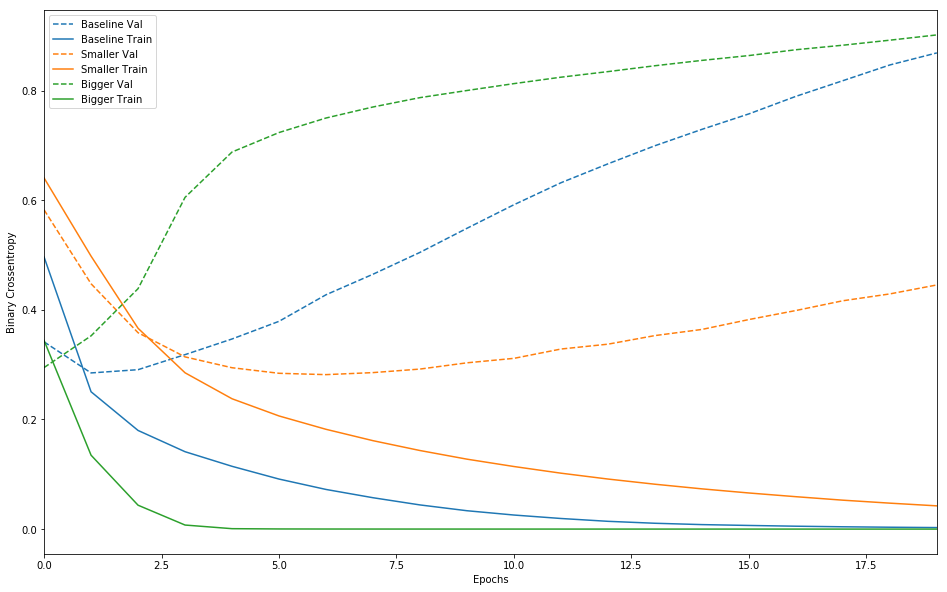

In [15]:
plot_history([("baseline", baseline_history),
             ("smaller", smaller_history),
              ('bigger', bigger_history)])

- 较大的网络几乎仅仅 1 个周期之后便立即开始过拟合

### 权重正则化
简单模型：参数分布对应的熵较低（复杂程度低）


因此考虑降低模型的熵：H（W）= -SUM(p(wi)log p(wi))

考虑强制权重采用较小值,引入“权重正则化”：通过向网络的损失函数添加与权重大相关的代价

- L1正则：所添加的代价与权重系数的绝对值成正比 -kW
- L2正则：添加的代价与权重系数值的平方成真比 -k * (W ** 2)
    * L2 正则化在神经网络领域也称为权重衰减，从数学角度来讲，权重衰减与 L2 正则化完全相同。

In [17]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, 
                       kernel_regularizer = keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, 
                       input_shape = (NUM_WORDS,)),
    keras.layers.Dense(16, 
                        kernel_regularizer = keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1,
                        kernel_regularizer = keras.regularizers.l2(0.001),
                       activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer="adam",
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
l2_history = l2_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.5507 - acc: 0.7871 - binary_crossentropy: 0.5128 - val_loss: 0.3984 - val_acc: 0.8746 - val_binary_crossentropy: 0.3586
Epoch 2/20
 - 7s - loss: 0.3201 - acc: 0.9053 - binary_crossentropy: 0.2749 - val_loss: 0.3383 - val_acc: 0.8881 - val_binary_crossentropy: 0.2890
Epoch 3/20
 - 8s - loss: 0.2655 - acc: 0.9254 - binary_crossentropy: 0.2134 - val_loss: 0.3363 - val_acc: 0.8876 - val_binary_crossentropy: 0.2821
Epoch 4/20
 - 7s - loss: 0.2397 - acc: 0.9368 - binary_crossentropy: 0.1836 - val_loss: 0.3440 - val_acc: 0.8836 - val_binary_crossentropy: 0.2868
Epoch 5/20
 - 7s - loss: 0.2258 - acc: 0.9436 - binary_crossentropy: 0.1669 - val_loss: 0.3570 - val_acc: 0.8812 - val_binary_crossentropy: 0.2972
Epoch 6/20
 - 7s - loss: 0.2130 - acc: 0.9496 - binary_crossentropy: 0.1523 - val_loss: 0.3684 - val_acc: 0.8781 - val_binary_crossentropy: 0.3071
Epoch 7/20
 - 7s - loss: 0.2050 - acc: 0.9519 - binary_crossentropy:

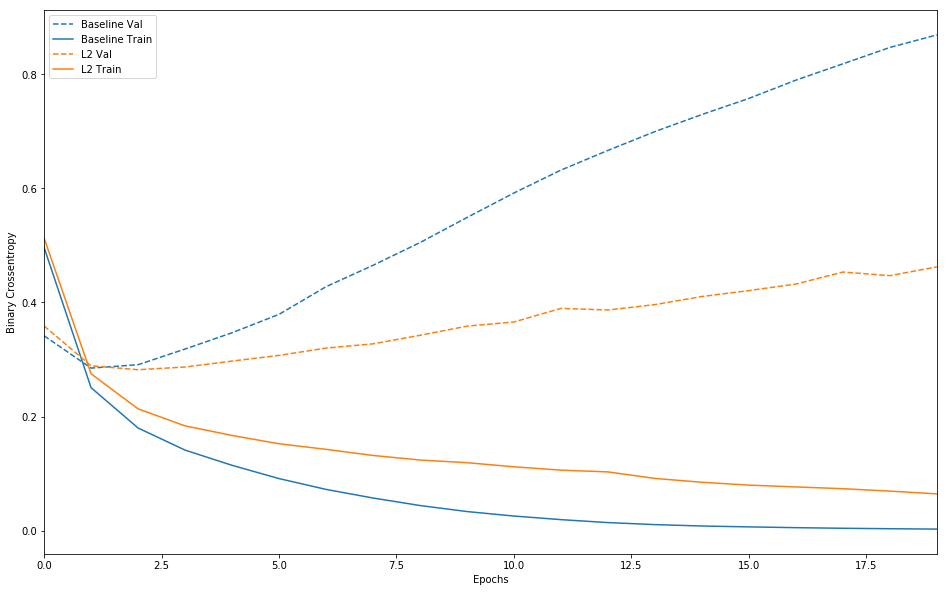

In [20]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])

### Dropout

网络不会丢弃任何单元，而是将层的输出值按等同于丢弃率的比例进行缩减

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.6494 - acc: 0.6070 - binary_crossentropy: 0.6494 - val_loss: 0.5506 - val_acc: 0.8438 - val_binary_crossentropy: 0.5506
Epoch 2/20
 - 7s - loss: 0.5016 - acc: 0.7833 - binary_crossentropy: 0.5016 - val_loss: 0.3906 - val_acc: 0.8761 - val_binary_crossentropy: 0.3906
Epoch 3/20
 - 7s - loss: 0.3790 - acc: 0.8574 - binary_crossentropy: 0.3790 - val_loss: 0.3044 - val_acc: 0.8865 - val_binary_crossentropy: 0.3044
Epoch 4/20
 - 7s - loss: 0.3015 - acc: 0.8951 - binary_crossentropy: 0.3015 - val_loss: 0.2796 - val_acc: 0.8884 - val_binary_crossentropy: 0.2796
Epoch 5/20
 - 7s - loss: 0.2551 - acc: 0.9176 - binary_crossentropy: 0.2551 - val_loss: 0.2755 - val_acc: 0.8883 - val_binary_crossentropy: 0.2755
Epoch 6/20
 - 7s - loss: 0.2206 - acc: 0.9289 - binary_crossentropy: 0.2206 - val_loss: 0.2898 - val_acc: 0.8872 - val_binary_crossentropy: 0.2898
Epoch 7/20
 - 7s - loss: 0.1882 - acc: 0.9387 - binary_crossentropy:

#### keras中dropout的实现简化，按一定比率随机将tensor值设为0，即是为0的节点不在向前传播

In [23]:
import numpy as np

# dropout函数的实现
def dropout(x, level):
    if level < 0. or level >= 1: #level是概率值，必须在0~1之间
        raise ValueError('Dropout level must be in interval [0, 1[.')
    retain_prob = 1. - level

    # 我们通过binomial函数，生成与x一样的维数向量。binomial函数就像抛硬币一样，我们可以把每个神经元当做抛硬币一样
    # 硬币 正面的概率为p，n表示每个神经元试验的次数
    # 因为我们每个神经元只需要抛一次就可以了所以n=1，size参数是我们有多少个硬币。
    random_tensor = np.random.binomial(n=1, p=retain_prob, size=x.shape) #即将生成一个0、1分布的向量，0表示这个神经元被屏蔽，不工作了，也就是dropout了
    print(random_tensor)

    x *= random_tensor
    print(x)
    x /= retain_prob

    return x

#对dropout的测试，大家可以跑一下上面的函数，了解一个输入x向量，经过dropout的结果  
x=np.asarray([1,2,3,4,5,6,7,8,9,10],dtype=np.float32)
dropout(x,0.4)

[1 1 0 0 0 0 1 1 1 1]
[ 1.  2.  0.  0.  0.  0.  7.  8.  9. 10.]


array([ 1.6666666,  3.3333333,  0.       ,  0.       ,  0.       ,
        0.       , 11.666666 , 13.333333 , 14.999999 , 16.666666 ],
      dtype=float32)

 Keras中Dropout的实现，是屏蔽掉某些神经元，使其激活值为0以后，对激活值向量x1……x1000进行放大，也就是乘以1/(1-p)。防止测试输出抖动，保证期望一致。一种”补偿“的方案就是每个神经元的权重都乘以一个p，这样在“总体上”使得测试数据和训练数据是大致一样的。比如一个神经元的输出是x，那么在训练的时候它有p的概率参与训练，(1-p)的概率丢弃，那么它输出的期望是px+(1-p)0=px。因此测试的时候把这个神经元的权重乘以p可以得到同样的期望。
 
 
 知乎解释：当模型使用了dropout layer，训练的时候只有占比为p的隐藏层单元参与训练，那么在预测的时候，如果所有的隐藏层单元都需要参与进来，则得到的结果相比训练时平均要大1/p，为了避免这种情况，就需要测试的时候将输出结果乘以p使下一层的输入规模保持不变。训练的时候直接将dropout后留下的权重扩大1/p倍，这样就可以使结果的scale保持不变，而在预测的时候也不用做额外的操作了，更方便一些。


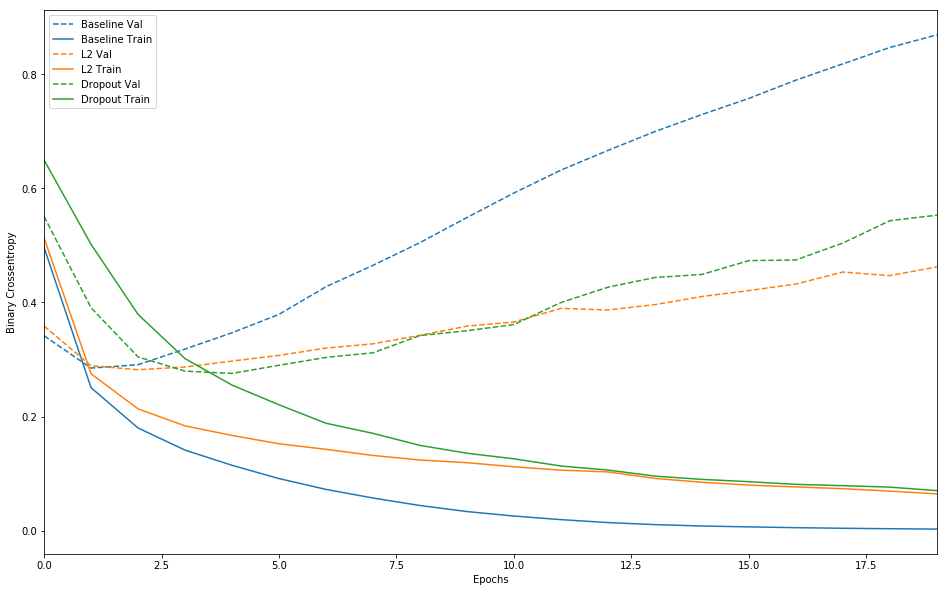

In [24]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history),
              ('Dropout', dpt_history)
             ])

## 总结

- 获取更多训练数据
- 添加权重正则化
- 添加丢弃层

- 降低网络容量：
    * 模型的容量是指其拟合各种函数的能力。容量低的模型可能很难拟合训练集。容量高的模型可能会过拟合，因为记住了不适用于测试集的训练集性质。

- 数据增强：数据平衡？标准化/正规化？
- 批次归一化：归一化

In [32]:
L2_dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,  kernel_regularizer = keras.regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_regularizer = keras.regularizers.l2(0.001), activation=tf.nn.sigmoid)
])

L2_dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

L2_dpt_history = L2_dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.6697 - acc: 0.6286 - binary_crossentropy: 0.6329 - val_loss: 0.5401 - val_acc: 0.8556 - val_binary_crossentropy: 0.5060
Epoch 2/20
 - 7s - loss: 0.5150 - acc: 0.7810 - binary_crossentropy: 0.4796 - val_loss: 0.3988 - val_acc: 0.8808 - val_binary_crossentropy: 0.3615
Epoch 3/20
 - 7s - loss: 0.4291 - acc: 0.8455 - binary_crossentropy: 0.3891 - val_loss: 0.3484 - val_acc: 0.8874 - val_binary_crossentropy: 0.3052
Epoch 4/20
 - 7s - loss: 0.3791 - acc: 0.8747 - binary_crossentropy: 0.3331 - val_loss: 0.3319 - val_acc: 0.8870 - val_binary_crossentropy: 0.2831
Epoch 5/20
 - 7s - loss: 0.3473 - acc: 0.8926 - binary_crossentropy: 0.2958 - val_loss: 0.3351 - val_acc: 0.8848 - val_binary_crossentropy: 0.2809
Epoch 6/20
 - 7s - loss: 0.3227 - acc: 0.9034 - binary_crossentropy: 0.2663 - val_loss: 0.3365 - val_acc: 0.8864 - val_binary_crossentropy: 0.2774
Epoch 7/20
 - 7s - loss: 0.3071 - acc: 0.9125 - binary_crossentropy:

#### Dropout范围一般选0.2-0.5
#### L2正则化系数选取一般配合学习率调整？

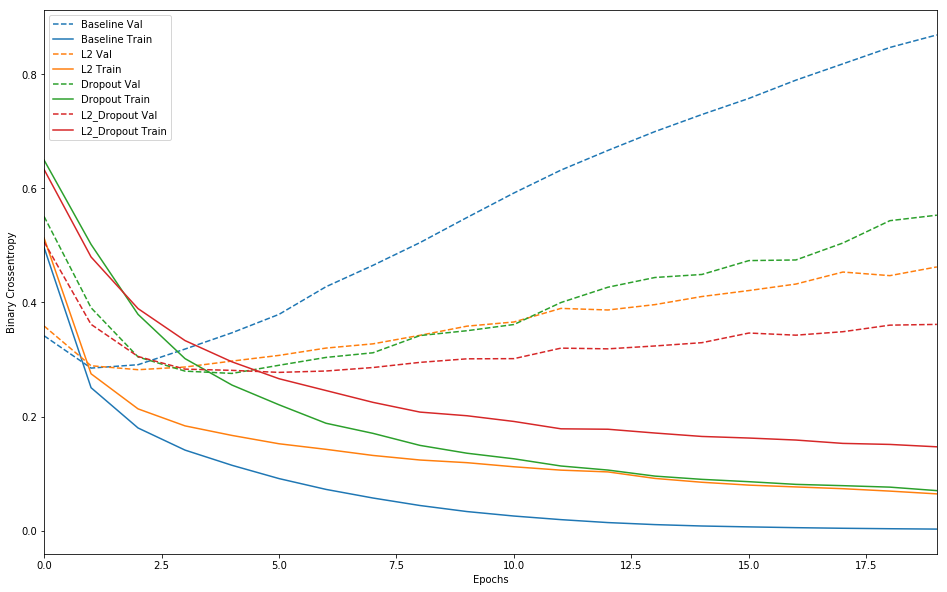

In [34]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history),
              ('Dropout', dpt_history),
              ('L2_Dropout', L2_dpt_history)
             ])